In [156]:
#http://seer.cancer.gov/statfacts/html/urinb.html
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats

In [157]:
# Need to remove person who answered twice

In [158]:
plt.style.use('ggplot')


In [159]:
conn = sqlite3.connect('untap.db')
c = conn.cursor()
c.execute('SELECT * FROM uploaded_data')
rows = c.fetchall()
upload_data = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()

In [160]:
idxGenome = upload_data.data_type.str.lower() == 'complete genomics'

In [161]:
withGenome = upload_data.loc[idxGenome.values]

In [162]:
upload_data['WithGenome'] = idxGenome

In [163]:
upload_data[upload_data.human_id == 'hu8073B9']

,id,human_id,date,data_type,source,name,download_description,download_url,report_description,report_url,WithGenome
861,862,hu8073B9,2013-08-09,Complete Genomics,PGP,CGI sample GS01239-DNA_G01 masterVarBeta report,(217 MB),,,,True
862,863,hu8073B9,2013-08-07,Complete Genomics,PGP,CGI sample GS01239-DNA_G01 from PGP sample,(220 MB),http://evidence.personalgenomes.org/genome_dow...,"• male • 2,788,048,537 positions covered • ref...",http://evidence.personalgenomes.org/genomes?di...,True


In [164]:
## loading in the cancer data
pgpdataCancer = pd.read_csv('PGPTrait&DiseaseSurvey2012-Cancers-2015.csv')

In [165]:
pgpdataCancer

,Participant,Timestamp,Do not touch!,Have you ever been diagnosed with one of the following conditions?,Other condition not listed here?
0,hu3073E3,10/8/2012 21:20:31,2mq3sb6idvs0wlmmttnssxvbqj36simgf1570mqmcmzck7...,NaN,NaN
1,huC7B886,10/9/2012 15:23:09,2sp29l1xdwtyxsi2not05x3belkw9y8s7wc75wxvfclx2d...,NaN,NaN
2,huF974A8,10/9/2012 18:38:44,1dnnvzq483ve95z91rhj8jw403bwwwatfo6gozqtnv6195...,NaN,NaN
3,hu620F18,10/9/2012 19:15:55,6al333u8ejd0hsi6dc6k6629fcyblmt0rlcixc1go0mu6g...,NaN,NaN
4,hu384E20,10/9/2012 21:56:50,2hn9a8kybfzyleuj6p28y02vwf9aaurm8pa11moth2av9k...,NaN,NaN
5,hu774230,10/9/2012 23:02:09,521hp2tcs1cmoluigadaagkxc7mcw85pc93w8e7klcjm5z...,NaN,NaN
6,huE9B698,10/10/2012 0:13:56,7m34kioa5hsek6jz8u1tawk3ec9zb73swca3kvr833ds459cr,NaN,NaN
7,huDBD591,10/10/2012 1:51:40,35t3zwqky7ykchkw9q5lj6smobvhwqssdxjlru53rmf1t6...,NaN,NaN
8,huDBD591,10/10/2012 1:58:38,1wmkntantkhl0bjignlasx8nbte81b3sbekv2zv90dhans...,NaN,Lipomas ICD9 code 214
9,hu6C733E,10/10/2012 9:22:44,3p072yhy21otvjpq8awl611ubi1d70q35eea9s4hej8lou...,NaN,NaN


In [166]:
test = pgpdataCancer.groupby('Have you ever been diagnosed with one of the following conditions?')['Participant'].count()

In [167]:
pgpdataCancer=pgpdataCancer.rename(columns = {'Have you ever been diagnosed with one of the following conditions?':'Conditions'})

In [168]:
pgpdataCancer.Conditions = pgpdataCancer.Conditions.fillna('None')

In [169]:
pgpdataCancer.Conditions = pgpdataCancer.Conditions.str.lower()

In [170]:
pgpdataCancer['Cancer'] = pgpdataCancer.Conditions.str.contains('cancer|melanoma|lymphoma|leukemia',na=False, regex = True)

In [171]:
pgpdataCancer.Cancer.sum()

242

In [172]:
pgpdataCancer=pgpdataCancer.rename(columns = {'Other condition not listed here?':'Other_Conditions'})
pgpdataCancer=pgpdataCancer.rename(columns = {'Participant':'human_id'})

In [173]:
pgpdataCancer.Other_Conditions = pgpdataCancer.Other_Conditions.str.lower()

In [174]:
pgpdataCancer.Other_Conditions = pgpdataCancer.Other_Conditions.fillna('None')
findMore = pgpdataCancer.Other_Conditions.str.contains('basal cell|basil cell|nasal cancer|baoral cancer|lymph node|cervical cancer|tongue|melanoma|testicular|skin cancer|squamous|lobular carcinoma',na=False, regex = True)

In [175]:
pgpdataCancer.Other_Conditions[findMore.values]

94             basal cell cancer and squamous cell cancer
97                                      lymph node cancer
236                       ocular melanoma, myelodysplasia
419                                     testicular cancer
471                          testicular cancer (seminoma)
605                      squamous cell tumor (face/cheek)
615                                  basal cell carcinoma
693                            basal cell carcinoma (ear)
714             basil cell and squamous cell skin cancers
836                               in situ cervical cancer
837                               in situ cervical cancer
891                  adenocarcinoma at base of the tongue
906                                  basal cell carcinoma
1017                             cancer of base of tongue
1031                                          skin cancer
1071                     lobular carcinoma in situ (lcis)
1072                     lobular carcinoma in situ (lcis)
1075     preca

In [176]:
pgpdataCancer['Other Cancer'] = findMore

In [177]:
pgpdataCancer['SurveyCancer'] = pgpdataCancer['Other Cancer'] | pgpdataCancer['Cancer']

In [178]:
conn = sqlite3.connect('untap.db')
c = conn.cursor()
c.execute('SELECT * FROM conditions')
rows = c.fetchall()
cond_data = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()
cond_data.name = cond_data.name.str.lower()
cond_data.name = cond_data.name.fillna('None')
cond_data['ConditionsCancer']= cond_data.name.str.contains('cancer|melanoma|lymphoma|leukemia|tumor|tumour|carcinoma',na=False, regex = True)
cond_data[cond_data.ConditionsCancer == True]
cond_data[cond_data.human_id == 'hu8073B9']

,id,human_id,name,start_date,end_date,ConditionsCancer
821,822,hu8073B9,earache,,,False
822,823,hu8073B9,headache,,,False
823,824,hu8073B9,hereditary hemorrhagic telangiectasia,,,False
824,825,hu8073B9,nasal cancer,1999-09-15,2002-01-30,True


In [179]:
# this merge is wrong!
cancer_data = pgpdataCancer.merge(cond_data,right_on='human_id', left_on = 'human_id',how='outer')

In [180]:
cancer_data.name = cancer_data.name.fillna('None')
cancer_data.SurveyCancer = cancer_data.SurveyCancer.fillna(False)
cancer_data.ConditionsCancer = cancer_data.ConditionsCancer.fillna(False)

In [181]:
cancer_data['AllCancer'] = cancer_data['SurveyCancer'] | cancer_data['ConditionsCancer']

In [182]:
alldata1 = upload_data.merge(cancer_data,left_on='human_id', right_on = 'human_id',how='outer',copy = False)

In [183]:
idx1 = alldata1.AllCancer.values == True
idx2 = alldata1.WithGenome.values == True
idxTotal = idx1 & idx2 

dataSubCancer = alldata1[idx1]
dataSub = alldata1[idxTotal]

In [184]:
dataSubCancer = dataSubCancer.drop_duplicates(subset='human_id')
dataSubCancer[['human_id','Conditions','Other_Conditions','name_y','data_type','name_x','download_url']]

,human_id,Conditions,Other_Conditions,name_y,data_type,name_x,download_url
0,hu43860C,"colon polyps, non-melanoma skin cancer",None,chest pain,image,Immunome 2008-2012,/user_file/download/548
322,hu9385BA,non-melanoma skin cancer,lymphangiomyoma,hypercholesterolemia,Microbiome,Microbiome data for PGP kit #2190 &#34;Caryll&...,
338,hu04FD18,NaN,NaN,basal cell skin cancer,Complete Genomics,CGI sample GS00253-DNA_F01_200_37,http://evidence.personalgenomes.org/genome_dow...
364,hu6E4515,"colon cancer, colon polyps",None,arrhythmia,Complete Genomics,LFR_CG,/user_file/download/1411
503,hu97DB4A,non-melanoma skin cancer,None,None,23andMe,LF6688_rawaln.cs.bam.bai,/user_file/download/649
790,hu92C40A,breast cancer,None,abdominal bloating,Complete Genomics,CGI sample GS01175-DNA_G03 masterVarBeta report,
814,huB1FD55,non-melanoma skin cancer,None,asthma,Complete Genomics,CGI sample GS01173-DNA_B07 masterVarBeta report,
1168,hu050E9C,prostate cancer,None,broken right femur,Complete Genomics,CGI sample GS01173-DNA_G06 masterVarBeta report,
1222,huDF04CC,non-melanoma skin cancer,None,astigmatism,Complete Genomics,CGI sample GS01175-DNA_B03 masterVarBeta report,
1266,huBA30D4,"colon polyps, prostate cancer",None,arthritis,Complete Genomics,CGI sample GS01173-DNA_H05 masterVarBeta report,


In [185]:
dataSub = dataSub.drop_duplicates(subset='human_id')
dataSub[dataSub.human_id == 'hu8073B9']


,id_x,human_id,date,data_type,source,name_x,download_description,download_url,report_description,report_url,...,Other_Conditions,Cancer,Other Cancer,SurveyCancer,id_y,name_y,start_date,end_date,ConditionsCancer,AllCancer
9384,862,hu8073B9,2013-08-09,Complete Genomics,PGP,CGI sample GS01239-DNA_G01 masterVarBeta report,(217 MB),,,,...,NaN,NaN,NaN,False,825,nasal cancer,1999-09-15,2002-01-30,True,True


In [186]:
dataSub[['human_id','Conditions','Other_Conditions','name_y','data_type','name_x','download_url']]

,human_id,Conditions,Other_Conditions,name_y,data_type,name_x,download_url
108,hu43860C,"colon polyps, non-melanoma skin cancer",None,chest pain,Complete Genomics,CGI sample GS00253-DNA_A01_200_37,http://evidence.personalgenomes.org/genome_dow...
334,hu9385BA,non-melanoma skin cancer,lymphangiomyoma,hypercholesterolemia,Complete Genomics,CGI sample GS00253-DNA_E01_200_37,http://evidence.personalgenomes.org/genome_dow...
338,hu04FD18,NaN,NaN,basal cell skin cancer,Complete Genomics,CGI sample GS00253-DNA_F01_200_37,http://evidence.personalgenomes.org/genome_dow...
364,hu6E4515,"colon cancer, colon polyps",None,arrhythmia,Complete Genomics,LFR_CG,/user_file/download/1411
790,hu92C40A,breast cancer,None,abdominal bloating,Complete Genomics,CGI sample GS01175-DNA_G03 masterVarBeta report,
814,huB1FD55,non-melanoma skin cancer,None,asthma,Complete Genomics,CGI sample GS01173-DNA_B07 masterVarBeta report,
1168,hu050E9C,prostate cancer,None,broken right femur,Complete Genomics,CGI sample GS01173-DNA_G06 masterVarBeta report,
1222,huDF04CC,non-melanoma skin cancer,None,astigmatism,Complete Genomics,CGI sample GS01175-DNA_B03 masterVarBeta report,
1266,huBA30D4,"colon polyps, prostate cancer",None,arthritis,Complete Genomics,CGI sample GS01173-DNA_H05 masterVarBeta report,
1304,hu26B551,breast cancer,None,asthma,Complete Genomics,CGI sample GS01175-DNA_F04 masterVarBeta report,


In [187]:
dataSubCancer = dataSubCancer.drop_duplicates(subset='human_id')
dataSubCancer.index.size

267

In [188]:
dataSub.index.size

30

In [251]:
totalCancer = dataSubCancer[['human_id','Conditions','Other_Conditions','name_y','data_type','name_x','download_url']]
idxBreast = dataSubCancer['Conditions'].str.contains('breast cancer',na=False) | dataSubCancer['name_y'].str.contains('breast cancer',na=False)
idxProstate = dataSubCancer['Conditions'].str.contains('prostate',na=False) | dataSubCancer['name_y'].str.contains('prostate',na=False)
idxLung = dataSubCancer['Conditions'].str.contains('lung',na=False) | dataSubCancer['name_y'].str.contains('lung',na=False)
idxColon = dataSubCancer['Conditions'].str.contains('colon cancer',na=False) | dataSubCancer['name_y'].str.contains('colon',na=False)
idxRectal = dataSubCancer['Conditions'].str.contains('rectal',na=False) | dataSubCancer['name_y'].str.contains('rectal',na=False)
idxBladder = dataSubCancer['Conditions'].str.contains('bladder',na=False) | dataSubCancer['name_y'].str.contains('bladder',na=False)
idxThyroid = dataSubCancer['Conditions'].str.contains('thyroid',na=False) | dataSubCancer['name_y'].str.contains('thyroid',na=False)
idxUterine = dataSubCancer['Conditions'].str.contains('uterine',na=False) | dataSubCancer['name_y'].str.contains('uterine',na=False)
idxSkin1 = dataSubCancer['Conditions'].str.contains('melanoma',na=False) | dataSubCancer['name_y'].str.contains('melanoma',na=False) |dataSubCancer['name_y'].str.contains('skin cancer',na=False)
idxSkin2 = dataSubCancer['Conditions'].str.contains('non-melanoma',na=False) | dataSubCancer['name_y'].str.contains('non-melanoma',na=False)
idxSkin3 = dataSubCancer['Conditions'].str.contains('basal cell',na=False) | dataSubCancer['name_y'].str.contains('basal cell',na=False)| dataSubCancer['Other_Conditions'].str.contains('basal cell',na=False)
idxSkin = idxSkin1 & ~idxSkin2
idxKidney = dataSubCancer['Conditions'].str.contains('kidney',na=False) | dataSubCancer['name_y'].str.contains('kidney',na=False)
idxLymph = dataSubCancer['Conditions'].str.contains('non-hodgkin lymphoma',na=False) | dataSubCancer['name_y'].str.contains('non-hodgkin lymphoma',na=False)
idxOvarian = dataSubCancer['Conditions'].str.contains('ovarian',na=False) | dataSubCancer['name_y'].str.contains('ovarian',na=False)
idxCervical= dataSubCancer['Conditions'].str.contains('cervical',na=False) | dataSubCancer['name_y'].str.contains('cervical',na=False)| dataSubCancer['name_y'].str.contains('cervix',na=False)
idxTesticular= dataSubCancer['Conditions'].str.contains('testicular',na=False) |dataSubCancer['Other_Conditions'].str.contains('testicular',na=False) | dataSubCancer['name_y'].str.contains('testicular',na=False)

In [252]:
 d = {'Breast': idxBreast, 'Prostate': idxProstate, 'Lung': idxLung, 'Colorectum': idxColon|idxRectal, 
      'Bladder': idxBladder, 'Thyroid': idxThyroid, 'Uterine': idxUterine, 'Melanoma':idxSkin,
      'Non-Hodgkin': idxLymph, 'Kidney': idxKidney, 'Ovarian':idxOvarian, 'Cervical':idxCervical,
      'Non-melanoma':idxSkin2 | idxSkin3, 'Testicular': idxTesticular}

alldata = pd.DataFrame(d)
cancerTotals = alldata.sum()
idxOther = alldata.sum(axis=1)
idxOther = idxOther == 0
otherCount = idxOther.sum() 
cancerTotals['Other'] = otherCount

In [253]:
test = dataSubCancer[['human_id','Conditions','Other_Conditions','name_y','data_type','name_x','download_url']]
test[idxOther]

,human_id,Conditions,Other_Conditions,name_y,data_type,name_x,download_url
1995,hu687B6B,endometrial cancer,None,adenosquamous carcinoma of uterus,Microbiome,Microbiome data for PGP kit #2250 &#34;Cedarhu...,
9384,hu8073B9,NaN,NaN,nasal cancer,Complete Genomics,CGI sample GS01239-DNA_G01 masterVarBeta report,
9934,huCFF045,none,precancerous squamous cells removed from forearm,None,23andMe,huCFF045,/user_file/download/1115
10096,huE2F2FC,brain cancer,None,allergies,Pathway genomics,pathway,/user_file/download/233
10477,hu766CAD,none,gist - gastrointestinal stromal tumor (rectal ...,gist cancer,health records - PDF or text,Blood Test,/user_file/download/608
11024,hu0486D6,none,tongue cancer,None,Illumina,PG0001257-BLD,/user_file/download/1048
11387,hu551EDB,NaN,NaN,pituitary tumor,biometric data - CSV or similar,Google Health Locker Data Folder,/user_file/download/358
11468,hu77CC58,none,myopapillary ependymoma of the filum terminale,spinal tumor,23andMe,genome.zip,/user_file/download/766
12596,hu781C4E,none,lymph node cancer,None,NaN,NaN,NaN
12696,huD75A2E,brain cancer,plantar fibromas non - malignant,frozen shoulder,NaN,NaN,NaN


In [254]:
cancerCompare = pd.DataFrame(columns=['PGP'])
cancerCompare['PGP']= cancerTotals[0:]

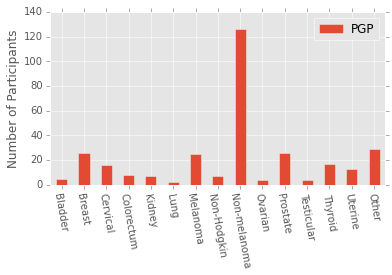

In [255]:
ax = cancerCompare.plot(kind='bar')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=280)
ax.set_ylabel('Number of Participants')

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('Cancer1.svg',format='svg')